In [3]:
import numpy as np
from scipy.stats import gamma
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
plt.style.use("ggplot")

$gamma(\theta|k,\lambda)\propto \theta^{k-1}\exp(-\lambda \theta)$

In [5]:
eps = 1e-2
lam = 1
k = 11
NMCS = 10000

In [6]:
f = lambda x, lam, k : (k-1) / x - lam

C:\Users\NDA04\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


<a list of 4 text.Text objects>

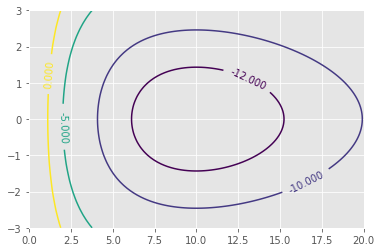

In [7]:
x, y = np.linspace(0,20,100),np.linspace(-3,3,100)
X,Y = np.meshgrid(x,y)
CS = plt.contour(X,Y,0.5*Y**2-(k-1)*np.log(X)+lam*X,levels=[-12,-10,-5,0])
plt.clabel(CS, inline=1,fontsize=10)

In [8]:
def euler(q,p,eps,lam,k,f):
    q_new = q+eps*p
    p_new = p+eps*f(q,lam,k)
    q,p = q_new,p_new
    return q,p

In [10]:
q,p = 4.0,0.0
euler_arr = np.zeros([NMCS, 2])
euler_arr[0,0] = q
euler_arr[0,1] = p
for i in range(1,NMCS):
    q,p = euler(q,p,eps,lam,k,f)
    euler_arr[i,0],euler_arr[i,1] = q,p
df_euler = pd.DataFrame(euler_arr,columns=["q","p"])

C:\Users\NDA04\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\Users\NDA04\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The following kwargs were not used by contour: 'labels'
  


<a list of 6 text.Text objects>

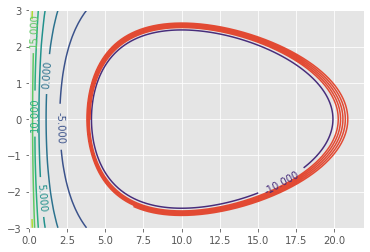

In [11]:
plt.plot(df_euler["q"],df_euler["p"])
CS = plt.contour(X,Y,0.5 * Y**2-(k-1)*np.log(X) + lam*X,labels = [-12,-10,-5,0])
plt.clabel(CS, inline=1,fontsize=10)

In [12]:
def leap_flog(q,p,eps,lam,k,f):
    p_new = p+0.5*eps*f(q,lam,k)
    q_new = q + eps * p_new
    p_new = p_new + 0.5*eps*f(q_new,lam,k)
    q,p = q_new,p_new
    return q,p

In [13]:
q,p = 4.0,0.0
lf_arr = np.zeros([NMCS, 2])
lf_arr[0,0] = q
lf_arr[0,1] = p
for i in range(1,NMCS):
    q,p = leap_flog(q,p,eps,lam,k,f)
    lf_arr[i,0],lf_arr[i,1] = q,p
df_lf = pd.DataFrame(lf_arr,columns=["q","p"])

C:\Users\NDA04\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\Users\NDA04\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The following kwargs were not used by contour: 'labels'
  


<a list of 6 text.Text objects>

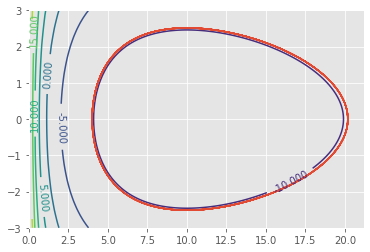

In [15]:
plt.plot(df_lf["q"],df_lf["p"])
CS = plt.contour(X,Y,0.5 * Y**2-(k-1)*np.log(X) + lam*X,labels = [-12,-10,-5,0])
plt.clabel(CS, inline=1,fontsize=10)